In [4]:
import pandas as pd

from significance_analysis import conduct_analysis

# Load example dataset
data = pd.read_csv("./example_dataset.csv")

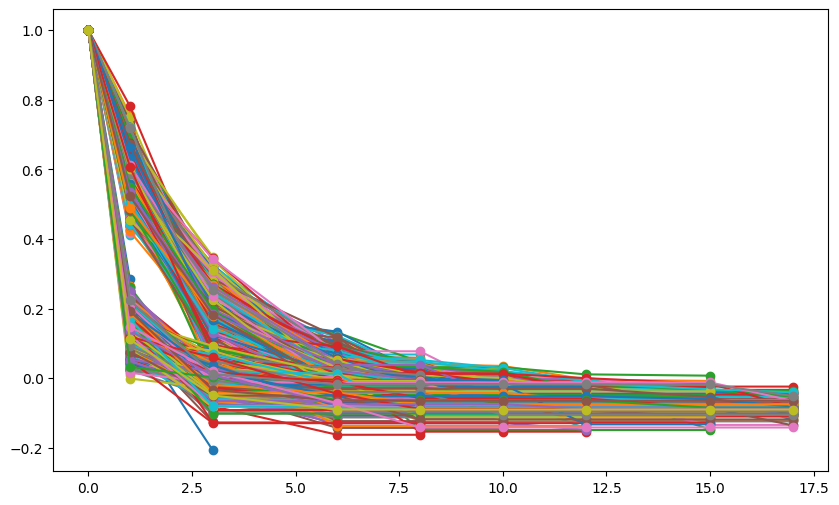

In [14]:
import numpy as np
import matplotlib.pyplot as plt
def algo_simulator(budget:int,workers:int,quality:float,noise:float,relevant_points:list[int]=[]):
    if not relevant_points:
        relevant_points=np.linspace(0,budget,False)
    all_points=[1]
    final_points=[]
    observations=[]
    for i in range((2**workers)):
        final_points.append([1])
        observations.append([0])
    

    for i in range(1,budget):
        multiplier=round(budget/i)
        current_power=workers-multiplier-1
        current_workers=2**current_power
        for j in range(current_workers):
            


        new_point=(np.exp(-quality*i)+np.random.normal(size=1,scale=noise))[0]
        all_points.append(np.min([all_points[-1],new_point]))
        if i+1 in relevant_points:
            observations.append(i)
            final_points.append(all_points[-1])
    #best_points.pop(0)
    return final_points,observations

max_budget=20
number_of_splits=10
points=list(set(np.round(np.linspace(0,max_budget,number_of_splits))))
number_of_workers_power=5
number_of_workers=2**number_of_workers_power
runs=[]
quality=[0.5,0.6,2]
color=["red","blue","gray"]
for algo_number in range(len(quality)):
    for current_budget in range(1,max_budget):
        for worker in range(int(np.ceil(number_of_workers/(2*(current_budget))))):
            #print(f"Budget: {current_budget}, Worker: {worker}")
            run=algo_simulator(budget=current_budget,quality=quality[algo_number],relevant_points=points,noise=0.05)
            #print(run)
            if run[0]!=[]:
                runs.append(list(run)+[algo_number])


_, axis = plt.subplots(figsize=(10, 6))
for number,group in enumerate(runs):
    axis.errorbar(
        group[1],
        group[0],
        fmt="o-",
        capsize=3,
        label=group[2],
        ecolor=color[group[2]]
    )
plt.show()

In [16]:
runs=[[3,2],[3,0.5],[3,3],[4,4]]
import random

for x in [4,3,2,1]:
    latest_entries=[]
    for run in runs:
        latest_entries.append(run[-1])
    candidates=latest_entries.copy()
    latest_entries.sort()
    for index,run in enumerate(runs):
        if latest_entries.index(run[-1])<x:
            runs[index].append(min([run[-1],random.randint(0,20)/20]))
        else:
            print(f"Run {index} out! {run}")

    print(runs)

[[3, 2, 0.45], [3, 0.5, 0.5], [3, 3, 0.6], [4, 4, 0.25]]
Run 2 out! [3, 3, 0.6]
[[3, 2, 0.45, 0.2], [3, 0.5, 0.5, 0.45], [3, 3, 0.6], [4, 4, 0.25, 0.25]]
Run 1 out! [3, 0.5, 0.5, 0.45]
Run 2 out! [3, 3, 0.6]
[[3, 2, 0.45, 0.2, 0.2], [3, 0.5, 0.5, 0.45], [3, 3, 0.6], [4, 4, 0.25, 0.25, 0.0]]
Run 0 out! [3, 2, 0.45, 0.2, 0.2]
Run 1 out! [3, 0.5, 0.5, 0.45]
Run 2 out! [3, 3, 0.6]
[[3, 2, 0.45, 0.2, 0.2], [3, 0.5, 0.5, 0.45], [3, 3, 0.6], [4, 4, 0.25, 0.25, 0.0, 0.0]]
